In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [86]:
penguins = sns.load_dataset('penguins')

In [87]:
print(penguins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [88]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [89]:
print("Statistics")
penguins.describe()

Statistics


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [90]:
print("Let's check for null values")
print(penguins.isnull().sum())

Let's check for null values
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [91]:
penguins=penguins.dropna(subset=['sex'])
print(penguins.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


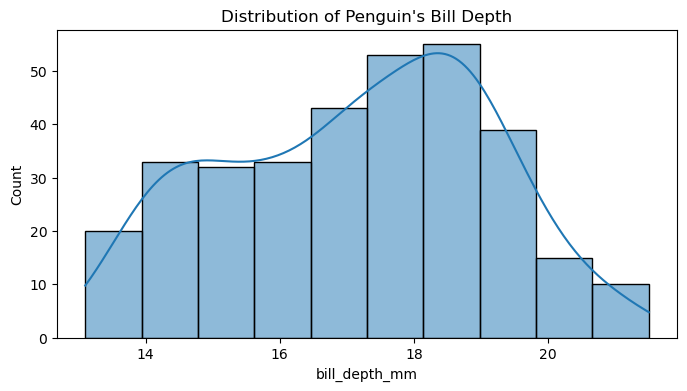

In [92]:
# Univariate Analysis

#Histogram + KDE for total_bill
plt.figure(figsize=(8,4))
sns.histplot(penguins['bill_depth_mm'],kde=True)
plt.title("Distribution of Penguin's Bill Depth")
plt.show()



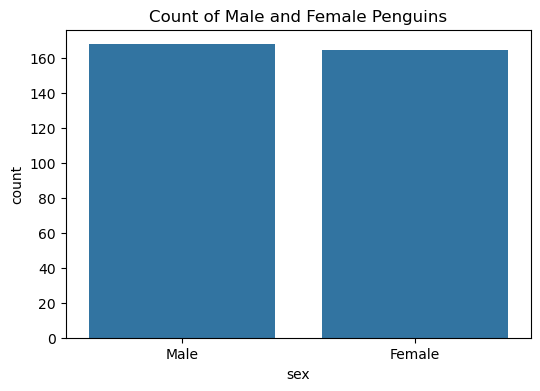

In [93]:
#Countplot 
plt.figure(figsize=(6,4))
sns.countplot(x='sex',data=penguins)
plt.title("Count of Male and Female Penguins")
plt.show()


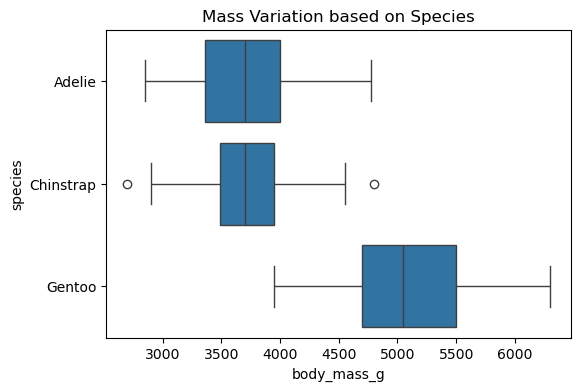

In [94]:
#Boxplot for 'species' by 'bdy_mass'
plt.figure(figsize=(6,4))
sns.boxplot(x='body_mass_g',y='species',data=penguins)
plt.title("Mass Variation based on Species")
plt.show()

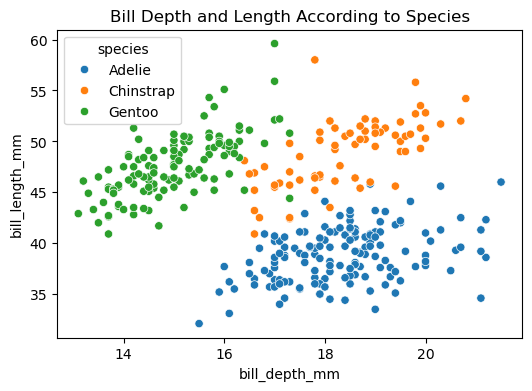

In [104]:
#3 Bivariate Analysis

#Scatterplot : total_bil vs tip
plt.figure(figsize=(6,4))
sns.scatterplot(x='bill_depth_mm',y='bill_length_mm',data=penguins,hue='species')
plt.title("Bill Depth and Length According to Species")
plt.show()



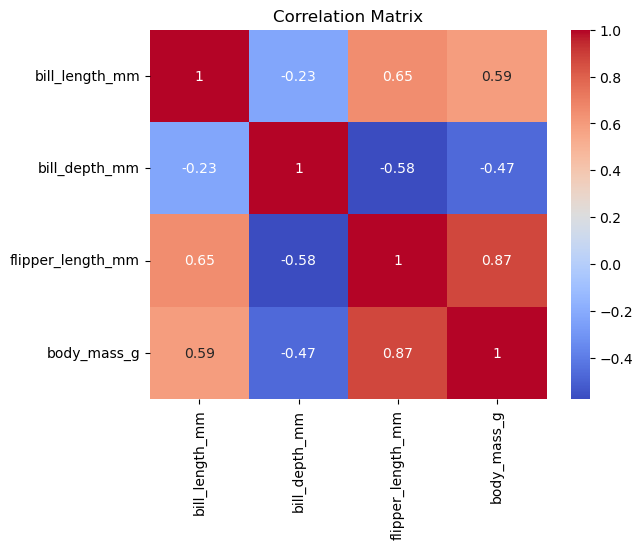

In [96]:
#Correlation Analysis

#Compute correlation matrix for numeric columns
corr=penguins.corr(numeric_only=True)

#Heat Map
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

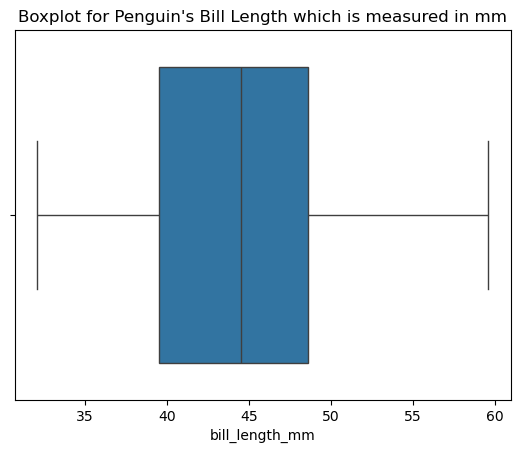

In [97]:
sns.boxplot(x=penguins['bill_length_mm'])
plt.title("Boxplot for Penguin's Bill Length which is measured in mm")
plt.show()

In [98]:
# Outlier Removal (IQR method) - InterQuartile Range

Q1=penguins['bill_length_mm'].quantile(0.25)
Q3=penguins['bill_length_mm'].quantile(0.65)
IQR=Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

penguins_clean = penguins[(penguins['bill_length_mm']>=lower_bound) & (penguins['bill_length_mm']<=upper_bound)]

print(f"\nOriginal Dataset size : {penguins.shape[0]}")
print(f"Dataset size after removing the outliers : {penguins_clean.shape[0]}")


Original Dataset size : 333
Dataset size after removing the outliers : 331


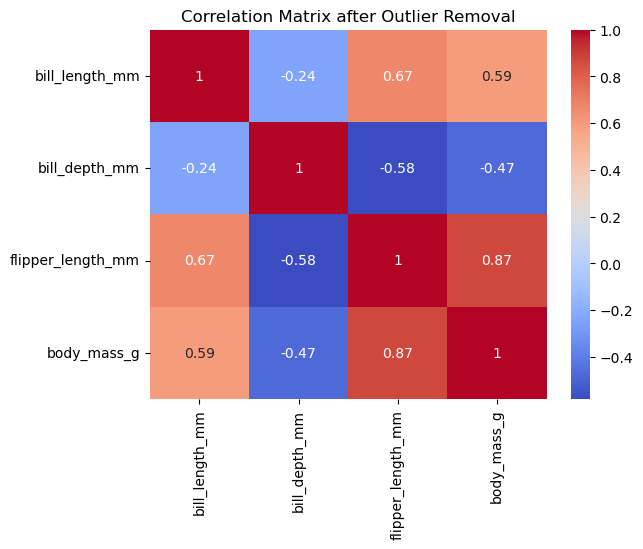

In [99]:
# Correlation after outlier removal

corr_clean = penguins_clean.corr(numeric_only=True)

sns.heatmap(corr_clean,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix after Outlier Removal")
plt.show()